## Assignment 2 - NYC Rolling Sales

Elizabeth Bella Ruth Septiana

PYTN-KS08-016 (batch 3)

Python for Data Science

- **Project Overview**
Pada project ke-2 ini menggunakan dataset dari kaggle, yaitu NYC Property Sales Dataset. Dataset ini berupa catatan dari setiap unit bangunan seperti apartment, dll yang terjual di pasar properti New York City selama periode 12 bulan. Dataset ini berisi:

- **BOROUGH**: Kode digit untuk wilayah tempat properti, seperti Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
- **BLOCK**: Kombinasi borough, block, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebut BBL.
- **BUILDING CLASS AT PRESENT** and **BUILDING CLASS AT TIME OF SALE**: Jenis bangunan di berbagai titik waktu.

Perhatikan bahwa karena ini adalah kumpulan data transaksi keuangan, ada beberapa hal yang perlu diingat:

- Banyak penjualan terjadi dengan jumlah dolar yang sangat kecil: $0 paling umum. orang tua ini mentransfer kepemilikan ke rumah mereka kepada seorang anak setelah pindah untuk pensiun.

- Kumpulan data ini menggunakan definisi keuangan dari suatu bangunan/unit bangunan, untuk tujuan perpajakan. dalam hal satu entitas memiliki bangunan yang bersangkutan, penjualan mencakup nilai seluruh bangunan. dalam hal sebuah bangunan dimiliki sedikit demi sedikit oleh penghuninya (kondominium), penjualan mengacu pada satu apartemen (atau sekelompok apartemen) yang dimiliki oleh beberapa individu.

## Import Libraries

In [57]:
import math
import numpy as np
import scipy.stats
import statistics
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

## Persiapan Data

In [58]:
# Membaca data NYC Rolling Sales 
df = pd.read_csv('nyc-rolling-sales.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [59]:
# Melihat kolom data 
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [60]:
# Melihat nilai unik pada data NYC Rolling Sales 
for i in df.columns:
    print("\n", i)
    print(df[i].unique())


 Unnamed: 0
[    4     5     6 ... 26737 26738 26739]

 BOROUGH
[1 2 3 4 5]

 NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON

Bedasarkan data diatas, dapat diamati bahwa pada kolom *unnamed:0* dan *EASE-MENT* tidak ada informasi yang dapat digunakan. Sehingga kedua kolom ini perlu di hapus dari tabel. 

pada kolom *Year Built* dan *Zip Code* tidak bernilai 0 sehingga pada kedua kolom ini dapat diganti menjadi *nan*

In [61]:
# Membuat variable missing values
miss_val = ['na','--','NaN','NA','n/a','?',' ','n-a',' -  ']
df = pd.read_csv('nyc-rolling-sales.csv', na_values=miss_val)

## Pemrosesan Data 

In [62]:
#Menghapus kolom unnamed:0 dan EASE-MENT
df.drop(["Unnamed: 0", "EASE-MENT"], axis=1, inplace=True)

In [63]:
#Menghapus kolom Apartment Number
df.drop(["APARTMENT NUMBER"], axis=1, inplace=True)

In [64]:
#Mengubah data sale date ke date time
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [65]:
#Mengubah tipe data menjadi data numeric
num = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in num: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [66]:
#Mengubah tipe data menjadi categirical 
#Mengubah tipe data menjadi categorical
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 
               'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [67]:
#cek tipe data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   ZIP CODE                        84548 non-null  category      
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

**Keterangan**: 
- Mengecek tipe data setiap kolom untuk mempermudah pengelompokkan setiap kolom dengan tipe data yang sama dengan tujuan mempermudah pengerjaan

In [68]:
#cek missing values 
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

**Keterangan**: 
- Berdasarkan hasil pengecekan missing values di atas terdapat nilai null pada *Land Square Feet* sebanyak 26252, *Gross Square Feet* sebanyak 27612, *Sale Price* sebanyak 14561 dan *Building Class at Present* dan *Tax Class at Present* sebanyak 738.

In [69]:
#cek data duplikat 
df.duplicated().sum()

765

In [70]:
# hapus data duplikat
df.drop_duplicates(inplace = True)

In [54]:
#Melihat skewness dari setiap kolom
df.skew(axis=0, skipna=True)

C:\Users\eliza\AppData\Local\Temp\ipykernel_17320\1019434457.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0, skipna=True)


Unnamed: 0             0.440781
BLOCK                  1.049335
LOT                    3.500679
EASE-MENT                   NaN
RESIDENTIAL UNITS     60.702733
COMMERCIAL UNITS     214.401123
TOTAL UNITS           63.448337
LAND SQUARE FEET      73.341981
GROSS SQUARE FEET     59.636819
SALE PRICE           124.094251
dtype: float64

Pada kolom seperti Borough, Zip code, dan Year Built tidak muncuk di atas karena hasilnya kurang dari 0 (Negatif) 

**Tipe data Numerik:**
- Jika nilai Skew kurang dari + - 2, maka hubungkan dengan mean dan Vice versa.

**Tipe data Kategorial:** 
- dihubungkan dengan mode

In [55]:
#handling missing values 
#Tipe data kategorial 
rep_mode = ['TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT']
for col1 in rep_mode:
    df[col1].fillna(df[col1].mode(), inplace=True)

#Tipe data numeric
df["LAND SQUARE FEET"]=df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].median())
df["GROSS SQUARE FEET"]=df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].median())
df["SALE PRICE"]=df["SALE PRICE"].fillna(df["SALE PRICE"].median())

In [35]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  64934
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [71]:
#Menghapus data duplikat pada kolom YEAR BUILT
years = df["YEAR BUILT"].drop_duplicates()
years

0        1900
3        1913
6        1920
10       1910
11       2009
         ... 
33557    1871
39533    1893
44615    1865
45042    1882
81875    1680
Name: YEAR BUILT, Length: 158, dtype: category
Categories (158, int64): [0, 1111, 1680, 1800, ..., 2014, 2015, 2016, 2017]

In [72]:
#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,5.772900e+04,5.639800e+04,6.960700e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.854481e+03,3.894416e+03,1.280703e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,4.154737e+04,3.483726e+04,1.143036e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,1.643000e+03,1.040000e+03,2.300000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.552000e+03,9.500000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


In [73]:
#Menghitung nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE
print("Nilai 0 pada YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Nilai 0 pada TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Nilai 0 pada SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Nilai 0 pada YEAR BUILT:  6885
Nilai 0 pada TOTAL UNIT:  19677
Nilai 0 pada SALE PRICE:  10012


In [74]:
#Menghapus nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE
df['YEAR BUILT'].replace(0, np.nan, inplace=True)
df['TOTAL UNITS'].replace(0, np.nan, inplace=True)
df['SALE PRICE'].replace(0, np.nan, inplace=True)

In [85]:
#Pengecekan nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE 
print("Nilai 0 pada YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Nilai 0 pada TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Nilai 0 pada SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Nilai 0 pada YEAR BUILT:  0
Nilai 0 pada TOTAL UNIT:  0
Nilai 0 pada SALE PRICE:  0


In [75]:
#Menghapus missing values
df.dropna(inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32595 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         32595 non-null  category      
 1   NEIGHBORHOOD                    32595 non-null  category      
 2   BUILDING CLASS CATEGORY         32595 non-null  category      
 3   TAX CLASS AT PRESENT            32595 non-null  category      
 4   BLOCK                           32595 non-null  int64         
 5   LOT                             32595 non-null  int64         
 6   BUILDING CLASS AT PRESENT       32595 non-null  category      
 7   ADDRESS                         32595 non-null  object        
 8   ZIP CODE                        32595 non-null  category      
 9   RESIDENTIAL UNITS               32595 non-null  int64         
 10  COMMERCIAL UNITS                32595 non-null  int64         
 11  TO

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


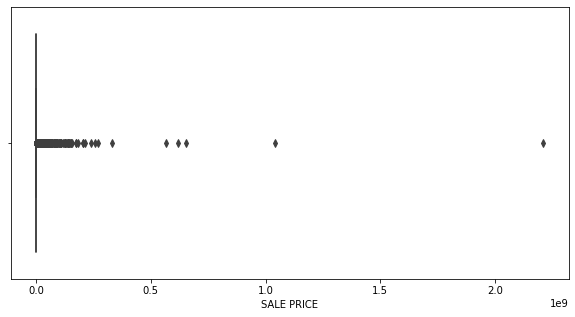

In [77]:
#Membuat boxplot untuk melihat outliers pada SALE PRICE
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.show()

Terlihat pada gambar diatas bahwa terdapat banyak outliers sehingga nilai dari sale price perlu difilter

In [78]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 800000)]

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


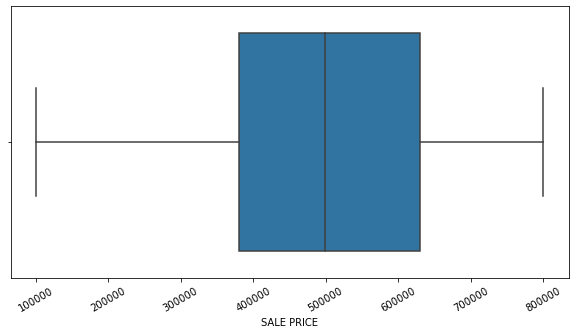

In [79]:
#Membuat boxplot untuk melihat outliers pada SALE PRICE
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.xticks(rotation=30)
plt.show()

In [80]:
#Melakukan encode pada kolom BOROUGH
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
223,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,10011,9,0,9.0,1566.0,6330.0,1901,2,C4,416790.0,2017-08-31
224,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,10011,9,0,9.0,1566.0,6330.0,1901,2,C4,630370.0,2017-08-31
277,Manhattan,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,744,32,C6,309 WEST 20TH STREET,10011,24,0,24.0,4600.0,12200.0,1850,2,C6,282000.0,2016-10-19
2062,Manhattan,FASHION,23 LOFT BUILDINGS,4,805,39,L1,115-123 W 29TH,10001,0,15,15.0,6994.0,79465.0,1913,4,L1,220000.0,2016-12-19
2587,Manhattan,FLATIRON,08 RENTALS - ELEVATOR APARTMENTS,2,844,8,D6,9 EAST 16TH STREET,10003,15,1,16.0,4600.0,30680.0,1900,2,D6,489854.0,2017-01-27


## Measure of Central Tendency 

# Mean 

In [82]:
#Menghitung nilai mean SALE PRICE pada setiap data di kolom BOROUGH
mean_saleprice = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True)
mean_saleprice

,SALE PRICE
BOROUGH,
Manhattan,412301.870968
Bronx,454719.496226
Staten Island,475046.863230
Queens,505965.437349
Brooklyn,531021.716746


**Kesimpulan**: 
- Berdasarkan dari tabel diatas, nilai rata-rata tertinggi terdapat di kota Brookyln sebesar 531021.7167. 

In [83]:
#Menghitung nilai mean pada setiap data di kolom BOROUGH
mean_all= df.groupby('BOROUGH').mean()
mean_all

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,1423.096774,84.387097,13.419355,1.967742,15.387097,3701.580645,29817.451613,412301.870968
Bronx,4229.494257,118.194289,2.068592,0.046275,2.114539,2620.252379,2278.153922,454719.496226
Brooklyn,5154.577713,371.171405,1.754513,0.058726,1.822992,1981.770284,1704.962440,531021.716746
Queens,9518.740413,57.921169,1.982466,0.360656,2.342409,3732.694654,2404.302067,505965.437349
Staten Island,3322.794502,82.033219,1.317526,0.056357,1.372738,4001.065521,1800.377090,475046.863230


**Kesimpulan**: 
Berdasarkan dari tabel diatas, maka dapat ditarik kesimpulan

- Manhattan memiliki nilai rata-rata tertinggi pada Resedential Units, Totak Unit, dan Gross Square Feet. 
- Kota Queens memiliki nilai rata-rata tertinggi pada kolom Block. 
- Kota State Island memiliki nilai rata-rata tertinggi pada Land Square Feet. 

## Median 

In [88]:
#Menghitung nilai median SALE PRICE pada setiap data di kolom BOROUGH
median_saleprice = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median_saleprice

,SALE PRICE
BOROUGH,
Manhattan,416790.0
Bronx,450000.0
Staten Island,475000.0
Queens,500000.0
Brooklyn,550000.0


**Kesimpulan:**
- Berdasarkan tabel diatas, maka dapat ditarik kesimpulan bahwa media tertinggi terdapat pada kota Brooklyn yaitu sebesar 550000 dan median terendah berada di kota Manhattan sebesar 416790.

## Modus 

In [89]:
#Menghitung nilai modus TOTAL UNIT pada setiap data di kolom BOROUGH
modus_saleprice = df[['BOROUGH','TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
modus_saleprice

,BOROUGH,TOTAL UNITS
0,Manhattan,2.0
1,Bronx,2.0
2,Brooklyn,1.0
3,Queens,1.0
4,Staten Island,1.0


**Kesimpulan:**
- Berdasarkan tabel diatas, maka dapat ditarik kesimpulan bahwa kota Manhattan dan Bronx memiliki nilai total unit sebesar 2, Sedangkan kota lainnnya memiliki total unit 1.

## Measure of Spread 

## Variance 

In [90]:
#Menghitung nilai variance pada setiap data di kolom BOROUGH
var_all = df.groupby('BOROUGH').var()
var_all

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,2.680148e+05,15049.178495,731.318280,38.432258,720.178495,7.950487e+06,1.599902e+09,4.425316e+10
Bronx,8.998643e+05,70474.574189,73.524841,0.072382,73.509857,8.828127e+06,5.613665e+07,2.292858e+10
Brooklyn,6.275066e+06,291303.238775,42.074012,0.124197,42.154008,2.533582e+08,7.328386e+07,2.853781e+10
Queens,1.544901e+07,11893.028715,545.378221,728.841394,1284.860498,2.568530e+09,2.057376e+09,2.845831e+10
Staten Island,5.368261e+06,8929.066953,5.736918,3.674642,9.303060,8.031624e+08,1.108372e+08,2.233635e+10


**Kesimpulan:** 
- Dari tabel diatas, maka dapat disimpulkan bahwa kota-kota yang memiliki nilai varian yang tinggi, berarti memiliki nilai distribusi yang besar.

# Range 

In [92]:
#Menghitung nilai range SALE PRICE pada setiap data di kolom BOROUGH
range_saleprice = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
range_saleprice

BOROUGH
Manhattan        622180.0
Bronx            697500.0
Brooklyn         698326.0
Queens           698634.0
Staten Island    698300.0
dtype: float64

**Kesimpulan:** 
- Dari tabel diatas, maka dapat disimpulkan bahwa tidak terdapat perbedaan yang signifikan pada setiap kota yaitu berkisar di angka 690000. 

# Standard Deviasi 

In [93]:
#Menghitung nilai standar deviasi pada setiap data di kolom BOROUGH
std_all = df.groupby('BOROUGH').std()
std_all

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,517.701481,122.675093,27.042897,6.199376,26.836142,2819.660722,39998.777309,210364.341582
Bronx,948.611759,265.470477,8.574663,0.269039,8.573789,2971.216482,7492.439587,151421.869236
Brooklyn,2505.008121,539.725151,6.486448,0.352416,6.492612,15917.228446,8560.599356,168931.371636
Queens,3930.522501,109.055164,23.353334,26.997063,35.844951,50680.670519,45358.312000,168695.923084
Staten Island,2316.950727,94.493740,2.395186,1.916935,3.050092,28340.120109,10527.926603,149453.520560


**Kesimpulan:** 
- Dari tabel diatas, maka dapat disimpulkan bahwa sebagian besar kota yang memiliki nilai standar deviasi yang tinggi, berarti memiliki nilai distribusi yang besar. 

# Probability Distribution

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Brooklyn')]

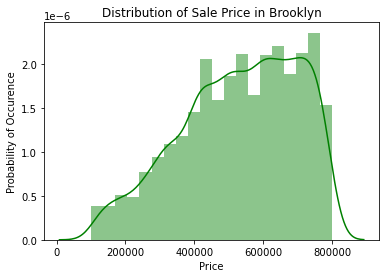

In [98]:
#Membuat probability distribution Brooklyn di kolom SALE PRICE 
df_1 = df.groupby("BOROUGH")
br = df_1.get_group('Brooklyn')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=20,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':0.45})

ax.set(xlabel='Price', 
       ylabel='Probability of Occurence', 
       title='Distribution of Sale Price in Brooklyn')

**Kesimpulan:** 
- Berdasarkan hasil grafik diatas, terlihat bahwa sale price kota Brooklyn lebih dominan ke kiri. Hal ini berarti bahwa nilai observasi berfrekuensi rendah lebih banyak di sebelah kiri dari rata-rata. 

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Bronx')]

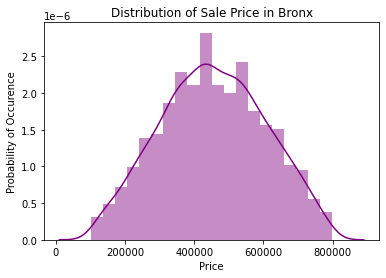

In [96]:
#Membuat probability distribution Bronx di kolom SALE PRICE 
df1 = df.groupby("BOROUGH")
br = df1.get_group('Bronx')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=20,
                  color='purple',
                  hist_kws={"linewidth": 15,'alpha':0.45})

ax.set(xlabel='Price', 
       ylabel='Probability of Occurence', 
       title='Distribution of Sale Price in Bronx')

**Kesimpulan:** 
- Berdasarkan dari grafik diatas, maka dapat disimpulkan bahwa sale price Bronx memiliki bentuk grafik ter distribusi normal. 

## Confidence Interval 

In [99]:
#Menampilkan mean, standard deviation, dan population size dari SALE PRICE
CI=df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
CI

SALE PRICE                     
                        mean            std  size
BOROUGH                                          
Manhattan      412301.870968  210364.341582    31
Bronx          454719.496226  151421.869236  3047
Brooklyn       531021.716746  168931.371636  4819
Queens         505965.437349  168695.923084  7015
Staten Island  475046.863230  149453.520560  4365

In [101]:
#Mengekstrak parameter yang diperlukan
mean_sp = CI.iloc[0,0]
sd = CI.iloc [0,1]
n = CI.iloc [0,2]         
z = 1.96    

In [102]:
#Menghitung standard error menggunakan formula untuk standard error dari mean
se = sd / np.sqrt(n)

In [103]:
#Membangun CI
lcb = mean_sp - z * se
ucb = mean_sp + z * se
lcb, ucb

(338248.07080100256, 486355.6711344813)

Berarti, rata-rata sebenarnya dari nilai sale price di kota Manhattan akan jatuh berkisar diantara 338248.0708 dan 486355.6711

## Hypothesis Testing
Dilakukan uji statistik yang dapat digunakan untuk memeriksa data ini memiliki data Gaussian. 

Menguji sampel data apakah memiliki distribusi Gaussian.

**Asumsi**

- Pengamatan di setiap sampel independen dan terdistribusi secara identik.

**Interpretasi**

- H0: Sampel memiliki distribusi Gaussian
- H1: Sampel tidak memiliki distribusi Gaussian

## D'Agostino's K^2 Test

In [104]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
br = df1.get_group('Bronx')
sp1 = br['SALE PRICE']

from scipy.stats import normaltest
stat, p = normaltest(sp1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=124.810, p=0.000
Probably not Gaussian


## Shapiro-Wilk Test

In [105]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
mh = df1.get_group('Manhattan')
sp = mh['SALE PRICE']

from scipy.stats import shapiro
stat, p = shapiro(sp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.910, p=0.013
Probably not Gaussian


## Anderson-Darling Test

In [106]:
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
brok = df1.get_group('Brooklyn')
sp2 = brok['SALE PRICE']

from scipy.stats import anderson
results = anderson(sp2)
print('stat=%.3f' % (results.statistic))
for i in range(len(results.critical_values)):
      sl, cv = results.significance_level[i], results.critical_values[i]
      if results.statistic < cv:
          print('Probably Gaussian at the %.1f%% level' % (sl))
      else:
          print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=39.849
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


**Kesimpulan:**
- nilai P-value yang didapatkan sebesar < 0.05, sehingga hipotesis H0 ditolak yang berarti bahwa sampel tidak terdistribusi Gaussian. 

## Kesimpulan:
1. Nilai mean tertinggi terdapat pada kota Brooklyn dengan nilai sebesar 531021.7167.
2. Nilai median tertinggi terdapat pada kota Brooklyn yaitu sebesar 550000 dan median terendah berada di kota Manhattan sebesar 416790.
3. Kota Manhattan dan Bronx memiliki paling tidak total 2 unit, sedangkan kota lainnya memiliki 1 total unit. 
4. Range sale price pada setiap kota memiliki nilai yang tidak jauh significant yaitu berkisar pada angka 690000. 
5. Sebagian besar kota memiliki nilai varians yang tinggi, berarti data memiliki distribusi yang besar.
6. Berdasarkan pengujian hipotesis, didapatkan p-value < 0.05 sehingga sampel tidak berdistribusi Gaussian atau H0 ditolak. 